<a href="https://colab.research.google.com/github/Rafat97/DataThrone-ML/blob/main/DataThrone_dataset_002_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download dataset

*   First we download  the dataset from drive  
*   Then we unzip the file


### Download dataset from google drive

In [ ]:
!gdown --id 1-5pUsXCTOZB9ZUIdrko9Wp-41vVhR2Zq

Downloading...
From: https://drive.google.com/uc?id=1-5pUsXCTOZB9ZUIdrko9Wp-41vVhR2Zq
To: /content/DataThrone.zip
100% 135k/135k [00:00<00:00, 50.3MB/s]


### Unzip file

In [ ]:
!unzip -u './DataThrone.zip' -d './dataset'

Archive:  ./DataThrone.zip


# Import All The Packages

We used the below mentioned packages -

*   Pandas
*   numpy
*   Ipython
*   seaborn
*   Sklearn
*   Matplotlib
*   Xgboost





In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor,LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

# Data Load

In [ ]:
DATA_PATH = './dataset/insight_002.xlsx'

In [ ]:
df = pd.read_excel(DATA_PATH) # load dataset 
df = df.drop([0])   # drop 0 row because for the data desceiption

# Data Processing & Clenning

*   At first, we do column striping
*   Then we replace the white spaces  with underscore 

### Columns text clenning 



* Replacing white space values with  '_'. Because, we can access columns easily



In [ ]:
df.columns = df.columns.str.strip() # columns strip
df.columns = df.columns.str.replace(' ', '_') # replace white space with underscore
df.columns 

Index(['Post_ID', 'Post_Message', 'Type', 'Countries', 'Languages', 'Posted',
       'Audience_Targeting', 'Lifetime_Post_Total_Reach',
       'Lifetime_Post_organic_reach', 'Lifetime_Post_Paid_Reach',
       'Lifetime_Post_Total_Impressions', 'Lifetime_Post_Organic_Impressions',
       'Lifetime_Post_Paid_Impressions', 'Lifetime_Engaged_Users',
       'Lifetime_Matched_Audience_Targeting_Consumers_on_Post',
       'Lifetime_Matched_Audience_Targeting_Consumptions_on_Post',
       'Lifetime_Negative_Feedback_from_Users', 'Lifetime_Negative_Feedback',
       'Lifetime_Post_Impressions_by_people_who_have_liked_your_Page',
       'Lifetime_Post_reach_by_people_who_like_your_Page',
       'Lifetime_Post_Paid_Impressions_by_people_who_have_liked_your_Page',
       'Lifetime_Paid_reach_of_a_post_by_people_who_like_your_Page',
       'Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post',
       'Lifetime_Organic_views_to_95%', 'Lifetime_Organic_views_to_95%.1',
       'Lifetim

### Drop columns



1.   Dropping columns that have all `0` values and null values
2.   We drop 



In [ ]:
DROPED_COLOUMN=[
                'Post_ID',
                "Posted",  
                'Countries',
                'Languages',
                'Post_Message',
                'Audience_Targeting',
                'Lifetime_Post_Paid_Reach',
                'Lifetime_Post_Paid_Impressions',
                'Lifetime_Post_Paid_Impressions_by_people_who_have_liked_your_Page',
                'Lifetime_Paid_reach_of_a_post_by_people_who_like_your_Page',
                'Lifetime_Paid_views_to_95%',
                'Lifetime_Paid_views_to_95%.1',
                'Lifetime_Paid_Video_Views',
                'Lifetime_Paid_Video_Views.1',
]
df_Post_Message_col=df['Post_Message'] # for spatial row in Post_Message
df_Posted_col=df['Posted'] # for spatial row in Posted
df.drop(DROPED_COLOUMN, axis = 1, inplace = True)  # droping columns

Counting the number of null values in the columns.

In [ ]:
df.isnull().sum() #check number of null value in field

Type                                                                   2
Lifetime_Post_Total_Reach                                              0
Lifetime_Post_organic_reach                                            0
Lifetime_Post_Total_Impressions                                        0
Lifetime_Post_Organic_Impressions                                      0
Lifetime_Engaged_Users                                                 0
Lifetime_Matched_Audience_Targeting_Consumers_on_Post                  0
Lifetime_Matched_Audience_Targeting_Consumptions_on_Post               0
Lifetime_Negative_Feedback_from_Users                                  0
Lifetime_Negative_Feedback                                             0
Lifetime_Post_Impressions_by_people_who_have_liked_your_Page           0
Lifetime_Post_reach_by_people_who_like_your_Page                       0
Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post    0
Lifetime_Organic_views_to_95%                      

In [ ]:
 df['Type'].fillna("Link",inplace=True) # assign emtry is `Link`

In [ ]:
df.isnull().sum()

Type                                                                   0
Lifetime_Post_Total_Reach                                              0
Lifetime_Post_organic_reach                                            0
Lifetime_Post_Total_Impressions                                        0
Lifetime_Post_Organic_Impressions                                      0
Lifetime_Engaged_Users                                                 0
Lifetime_Matched_Audience_Targeting_Consumers_on_Post                  0
Lifetime_Matched_Audience_Targeting_Consumptions_on_Post               0
Lifetime_Negative_Feedback_from_Users                                  0
Lifetime_Negative_Feedback                                             0
Lifetime_Post_Impressions_by_people_who_have_liked_your_Page           0
Lifetime_Post_reach_by_people_who_like_your_Page                       0
Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post    0
Lifetime_Organic_views_to_95%                      

### `Type` column convert string to int encode

Converting the 'type' column's string values to integer.

In [ ]:
labelEncoder = preprocessing.LabelEncoder() # LabelEncoder for encode string
df['Type'] = df['Type'].astype('str')
df['Type'] = labelEncoder.fit_transform( df['Type'])

labelEncoder.classes_

array(['Link', 'Photo', 'SharedVideo', 'Status', 'Video'], dtype=object)

### Data first 10 value visualization

Printing the top 10 values

In [ ]:
df.head(10) 

Type  ... Lifetime_Video_length
1      1  ...                     0
2      4  ...                 24355
3      1  ...                     0
4      1  ...                     0
5      1  ...                     0
6      4  ...                158706
7      4  ...                 19317
8      1  ...                     0
9      1  ...                     0
10     1  ...                     0

[10 rows x 19 columns]

###  Data last 10 value visualization

Printing the last 10 values

In [ ]:
df.tail(10)

Type  ... Lifetime_Video_length
282     1  ...                     0
283     1  ...                     0
284     1  ...                     0
285     1  ...                     0
286     1  ...                     0
287     3  ...                     0
288     2  ...                 15145
289     2  ...                115008
290     1  ...                     0
291     1  ...                     0

[10 rows x 19 columns]

### Getting info about the column

Checking the data type of each column

In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 1 to 291
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Type                                                                 291 non-null    int64 
 1   Lifetime_Post_Total_Reach                                            291 non-null    object
 2   Lifetime_Post_organic_reach                                          291 non-null    object
 3   Lifetime_Post_Total_Impressions                                      291 non-null    object
 4   Lifetime_Post_Organic_Impressions                                    291 non-null    object
 5   Lifetime_Engaged_Users                                               291 non-null    object
 6   Lifetime_Matched_Audience_Targeting_Consumers_on_Post                291 non-null    object
 7   Lifetime_Matched_

### Converting all data into integer

Converting all the data types to integer



In [ ]:
df = df.astype('int64') # convert all value into `int64`

Checking the column types 

In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 1 to 291
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype
---  ------                                                               --------------  -----
 0   Type                                                                 291 non-null    int64
 1   Lifetime_Post_Total_Reach                                            291 non-null    int64
 2   Lifetime_Post_organic_reach                                          291 non-null    int64
 3   Lifetime_Post_Total_Impressions                                      291 non-null    int64
 4   Lifetime_Post_Organic_Impressions                                    291 non-null    int64
 5   Lifetime_Engaged_Users                                               291 non-null    int64
 6   Lifetime_Matched_Audience_Targeting_Consumers_on_Post                291 non-null    int64
 7   Lifetime_Matched_Audience_

### Data describe

In [ ]:
df.head()

Type  ...  Lifetime_Video_length
1     1  ...                      0
2     4  ...                  24355
3     1  ...                      0
4     1  ...                      0
5     1  ...                      0

[5 rows x 19 columns]

In [ ]:
df.describe()

Type  ...  Lifetime_Video_length
count  291.000000  ...           2.910000e+02
mean     1.460481  ...           1.314499e+05
std      1.105309  ...           1.038465e+06
min      0.000000  ...           0.000000e+00
25%      1.000000  ...           0.000000e+00
50%      1.000000  ...           0.000000e+00
75%      2.000000  ...           0.000000e+00
max      4.000000  ...           1.418091e+07

[8 rows x 19 columns]

### Unique & count value in columns 

Counting the values of each clumns

In [ ]:
print("-"*100)
for col in df.columns:
  print(df[col].value_counts())
  print("-"*100)

----------------------------------------------------------------------------------------------------
1    186
3     29
4     28
0     28
2     20
Name: Type, dtype: int64
----------------------------------------------------------------------------------------------------
2        26
1        14
3         8
0         4
5         3
         ..
1330      1
1840      1
3887      1
1326      1
10690     1
Name: Lifetime_Post_Total_Reach, Length: 230, dtype: int64
----------------------------------------------------------------------------------------------------
2        26
1        14
3         8
0         4
5         3
         ..
1330      1
1840      1
3887      1
1326      1
10690     1
Name: Lifetime_Post_organic_reach, Length: 230, dtype: int64
----------------------------------------------------------------------------------------------------
2       25
1       14
3        7
0        4
4        3
        ..
998      1
7985     1
302      1
5421     1
1268     1
Name: Lifetime_Post_T

### Correlation of columns

Computing pairwise co-relation of all the columns

In [ ]:
df.corr() # Compute pairwise correlation of columns

Type  ...  Lifetime_Video_length
Type                                                1.000000  ...               0.120864
Lifetime_Post_Total_Reach                           0.251356  ...               0.092060
Lifetime_Post_organic_reach                         0.251356  ...               0.092060
Lifetime_Post_Total_Impressions                     0.298808  ...               0.083097
Lifetime_Post_Organic_Impressions                   0.298815  ...               0.083096
Lifetime_Engaged_Users                              0.284316  ...               0.206339
Lifetime_Matched_Audience_Targeting_Consumers_o...  0.298029  ...               0.235332
Lifetime_Matched_Audience_Targeting_Consumption...  0.286942  ...               0.286527
Lifetime_Negative_Feedback_from_Users               0.126153  ...               0.408839
Lifetime_Negative_Feedback                          0.099350  ...               0.377198
Lifetime_Post_Impressions_by_people_who_have_li...  0.351288  ...               0.069463
Lifetime_Post_reach_by_people_who_like_your_Page    0.280130  ...               0.080241
Lifetime_People_who_have_liked_your_Page_and_en...  0.298631  ...               0.152266
Lifetime_Organic_views_to_95%                       0.463430  ...              -0.019060
Lifetime_Organic_views_to_95%.1                     0.455782  ...              -0.018688
Lifetime_Organic_Video_Views                        0.544984  ...               0.311906
Lifetime_Organic_Video_Views.1                      0.509352  ...               0.315524
Lifetime_Average_time_video_viewed                  0.307251  ...               0.461891
Lifetime_Video_length                               0.120864  ...               1.000000

[19 rows x 19 columns]

# Data Analysis 

### Pair plot

Plotting pairwise relationships between the columns

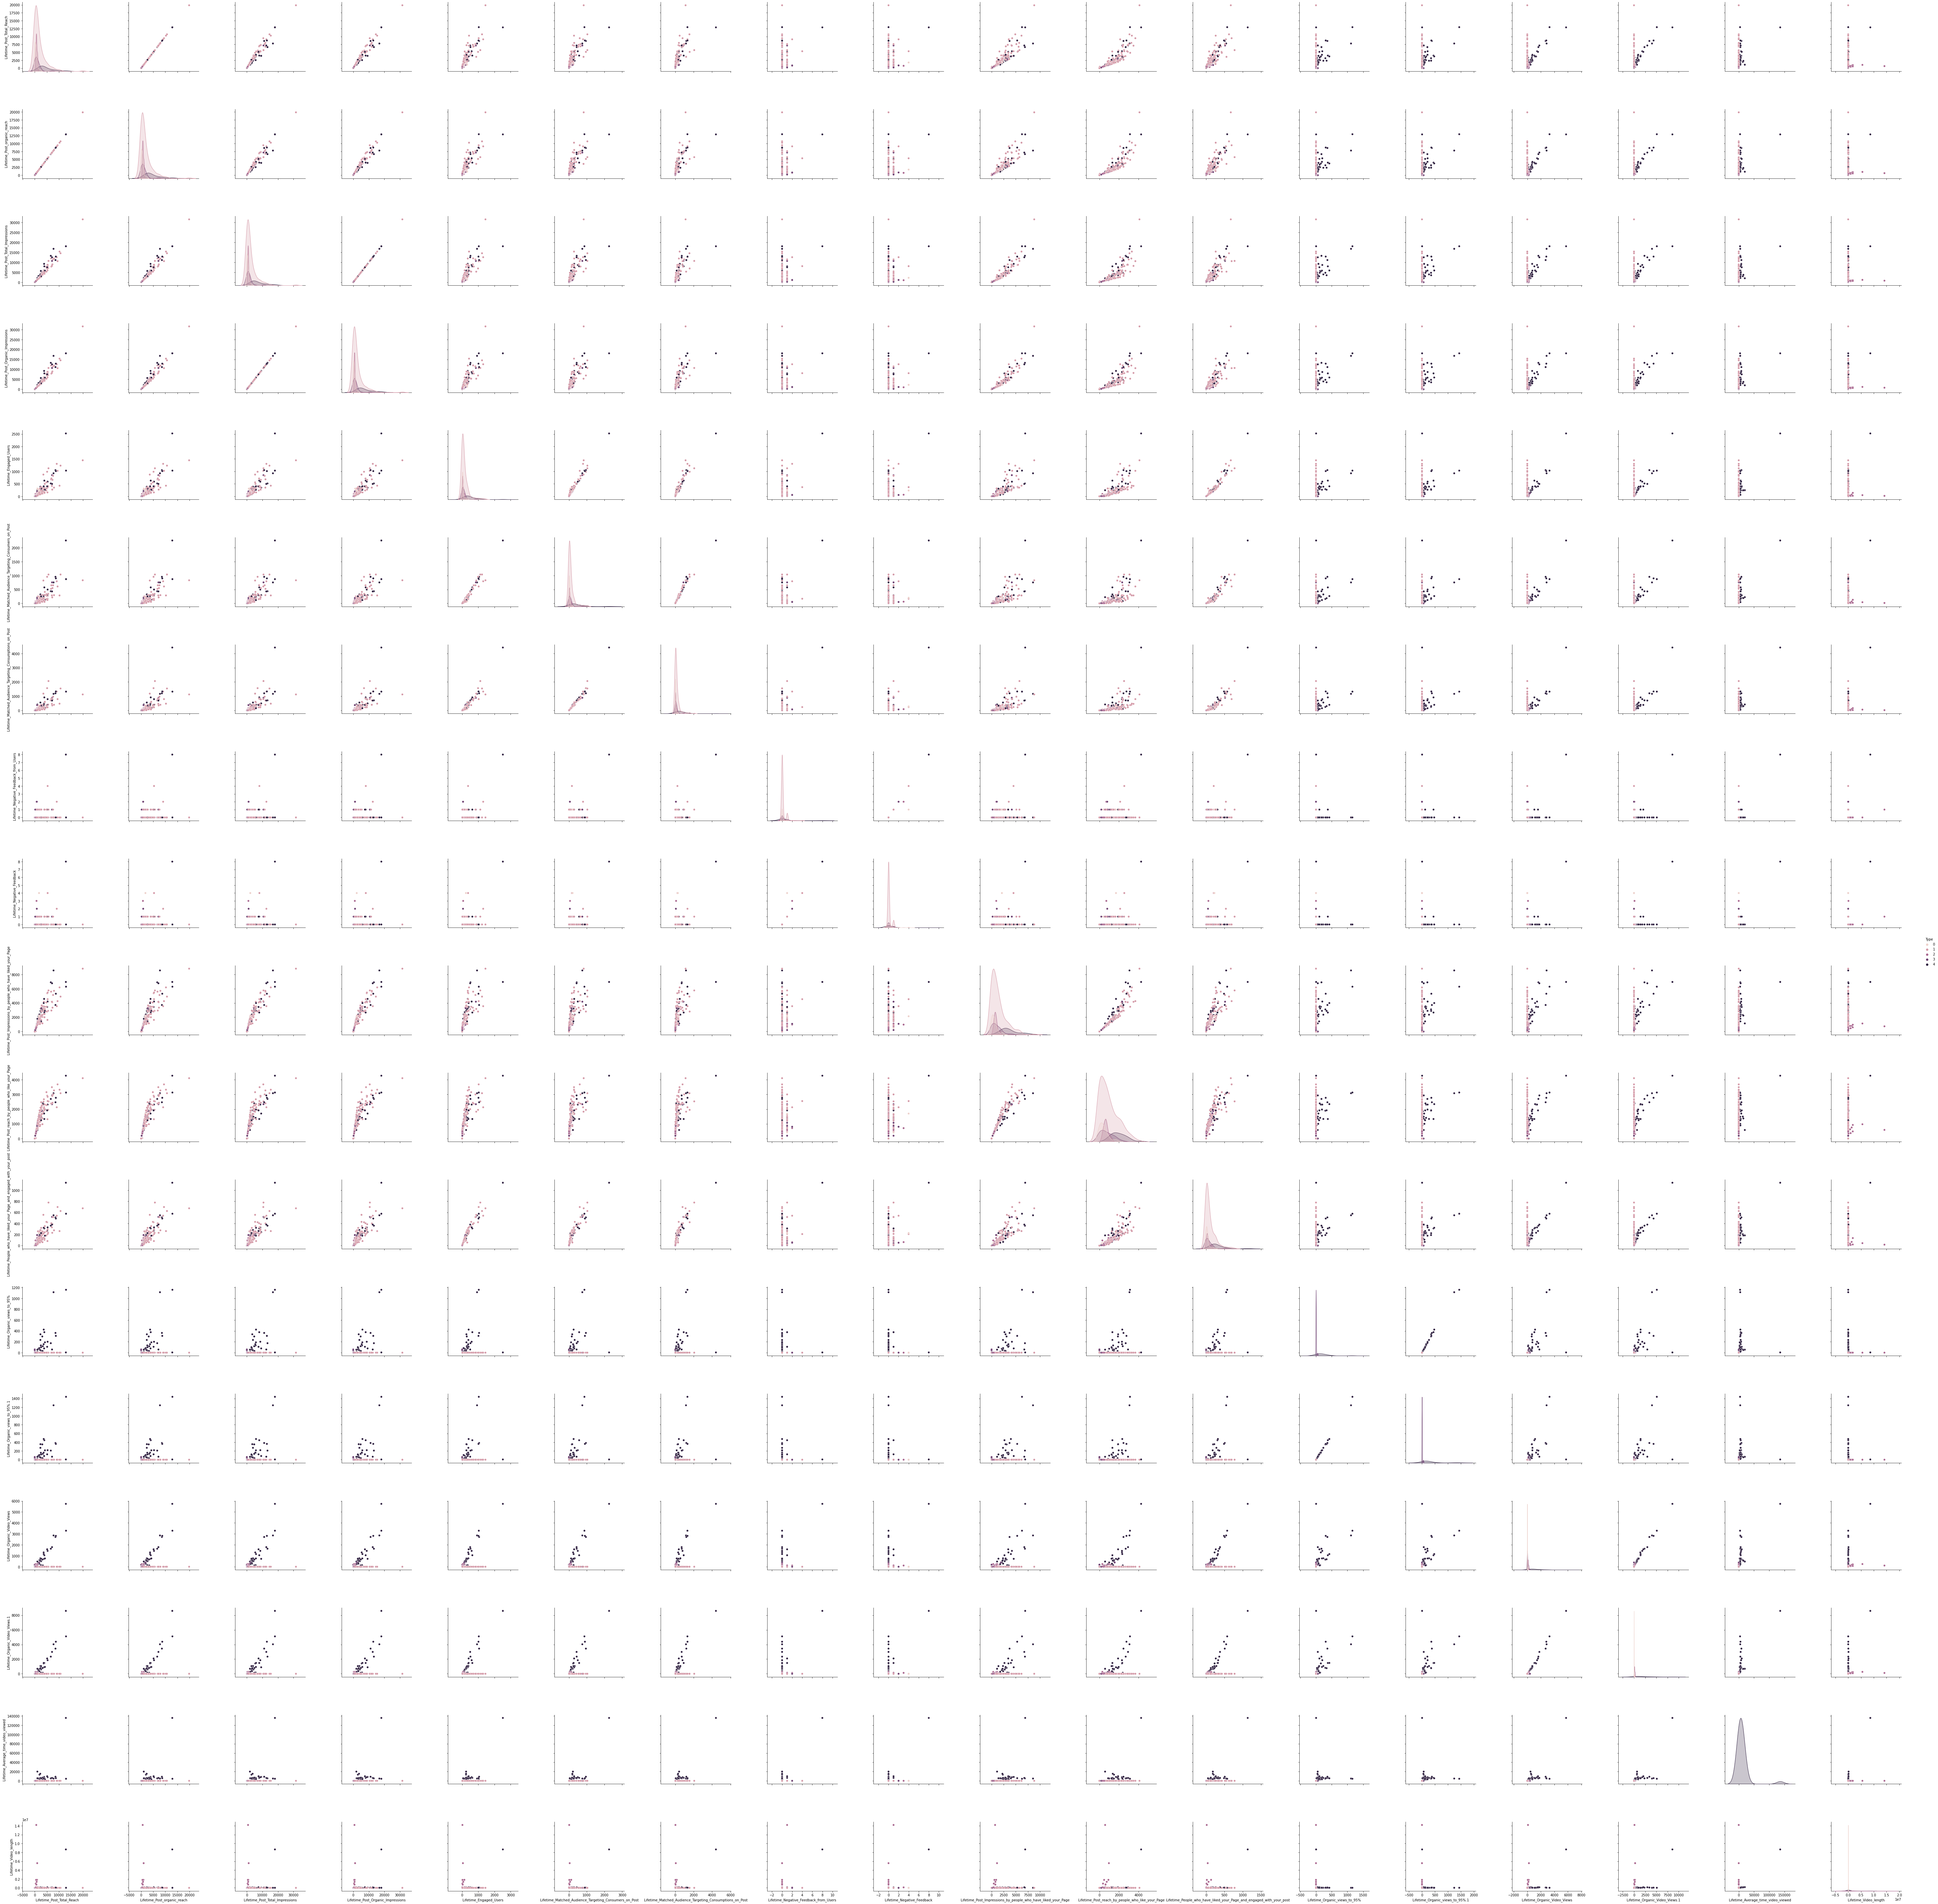

In [ ]:
sns.pairplot(df,height=4.5,hue='Type')

### Heat map

presenting the co-relation values between the columns visually with a heatmap

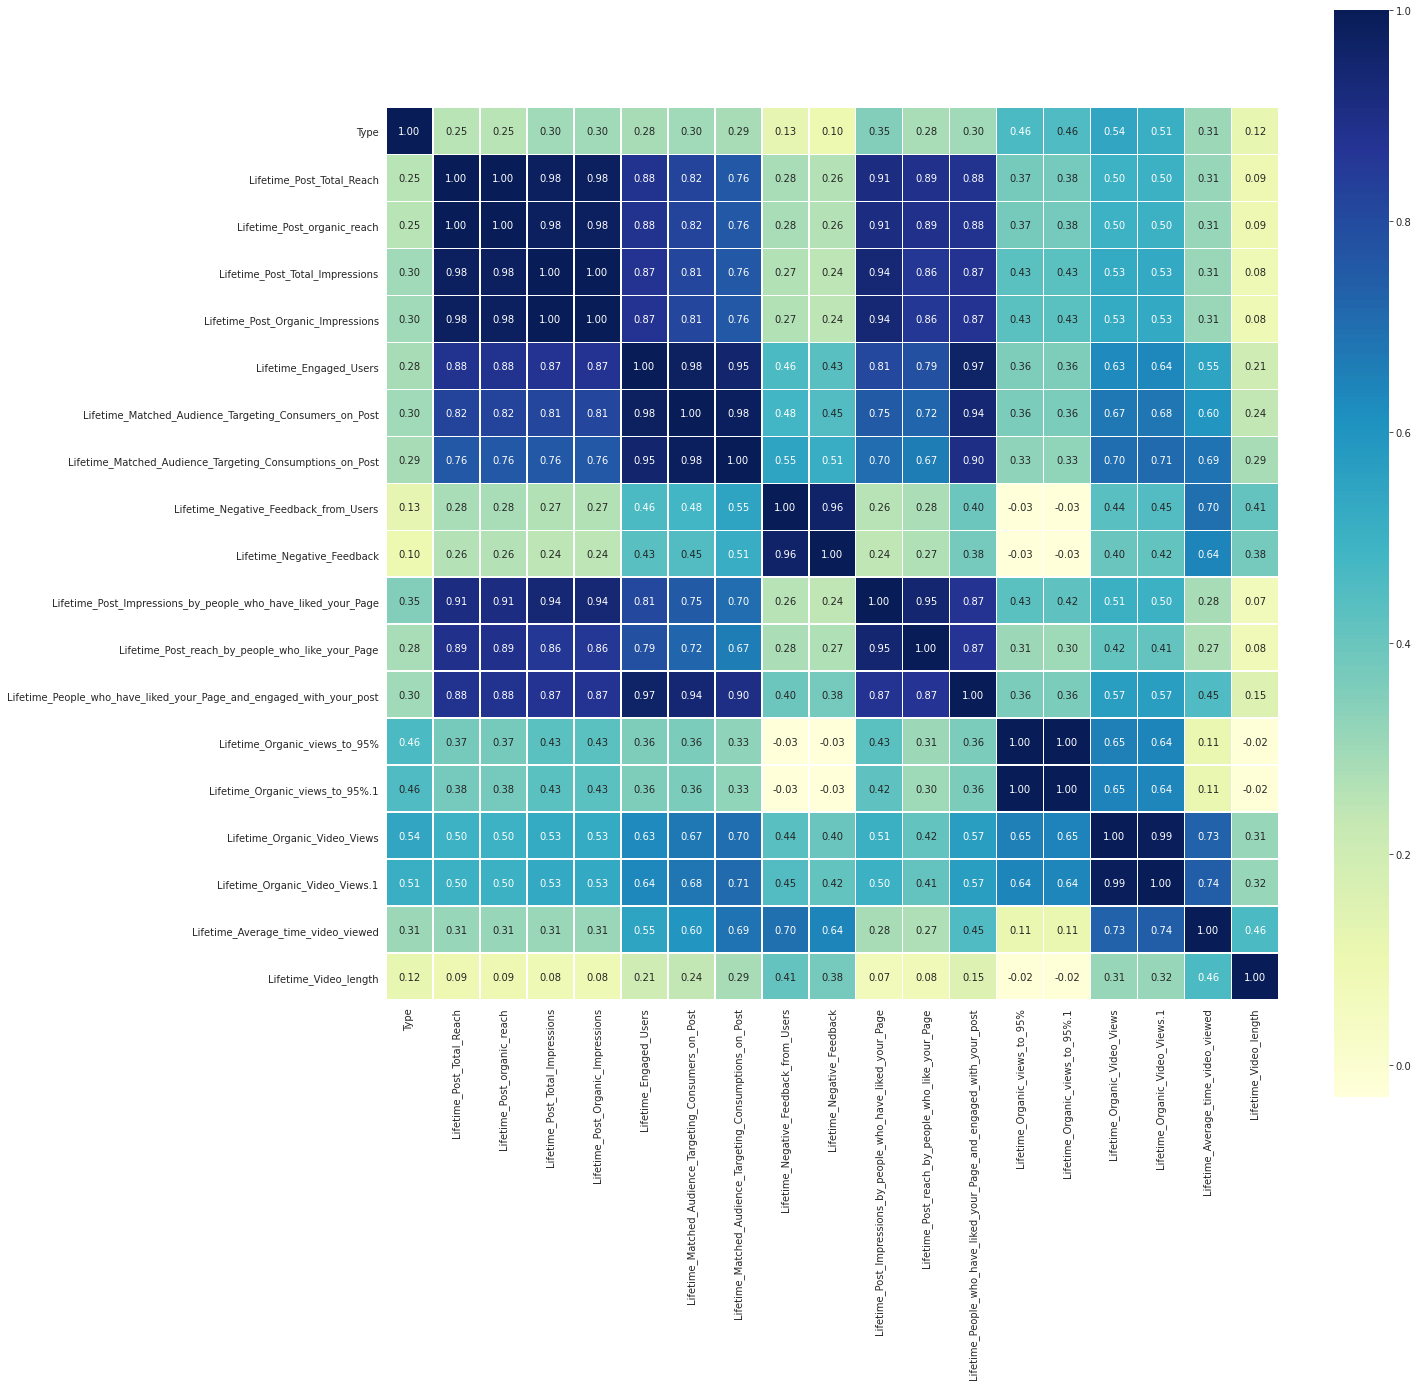

In [ ]:
corr = df.corr()  # Compute pairwise correlation of columns
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="YlGnBu")

Eliminating the repeating value pairs in the heatmap

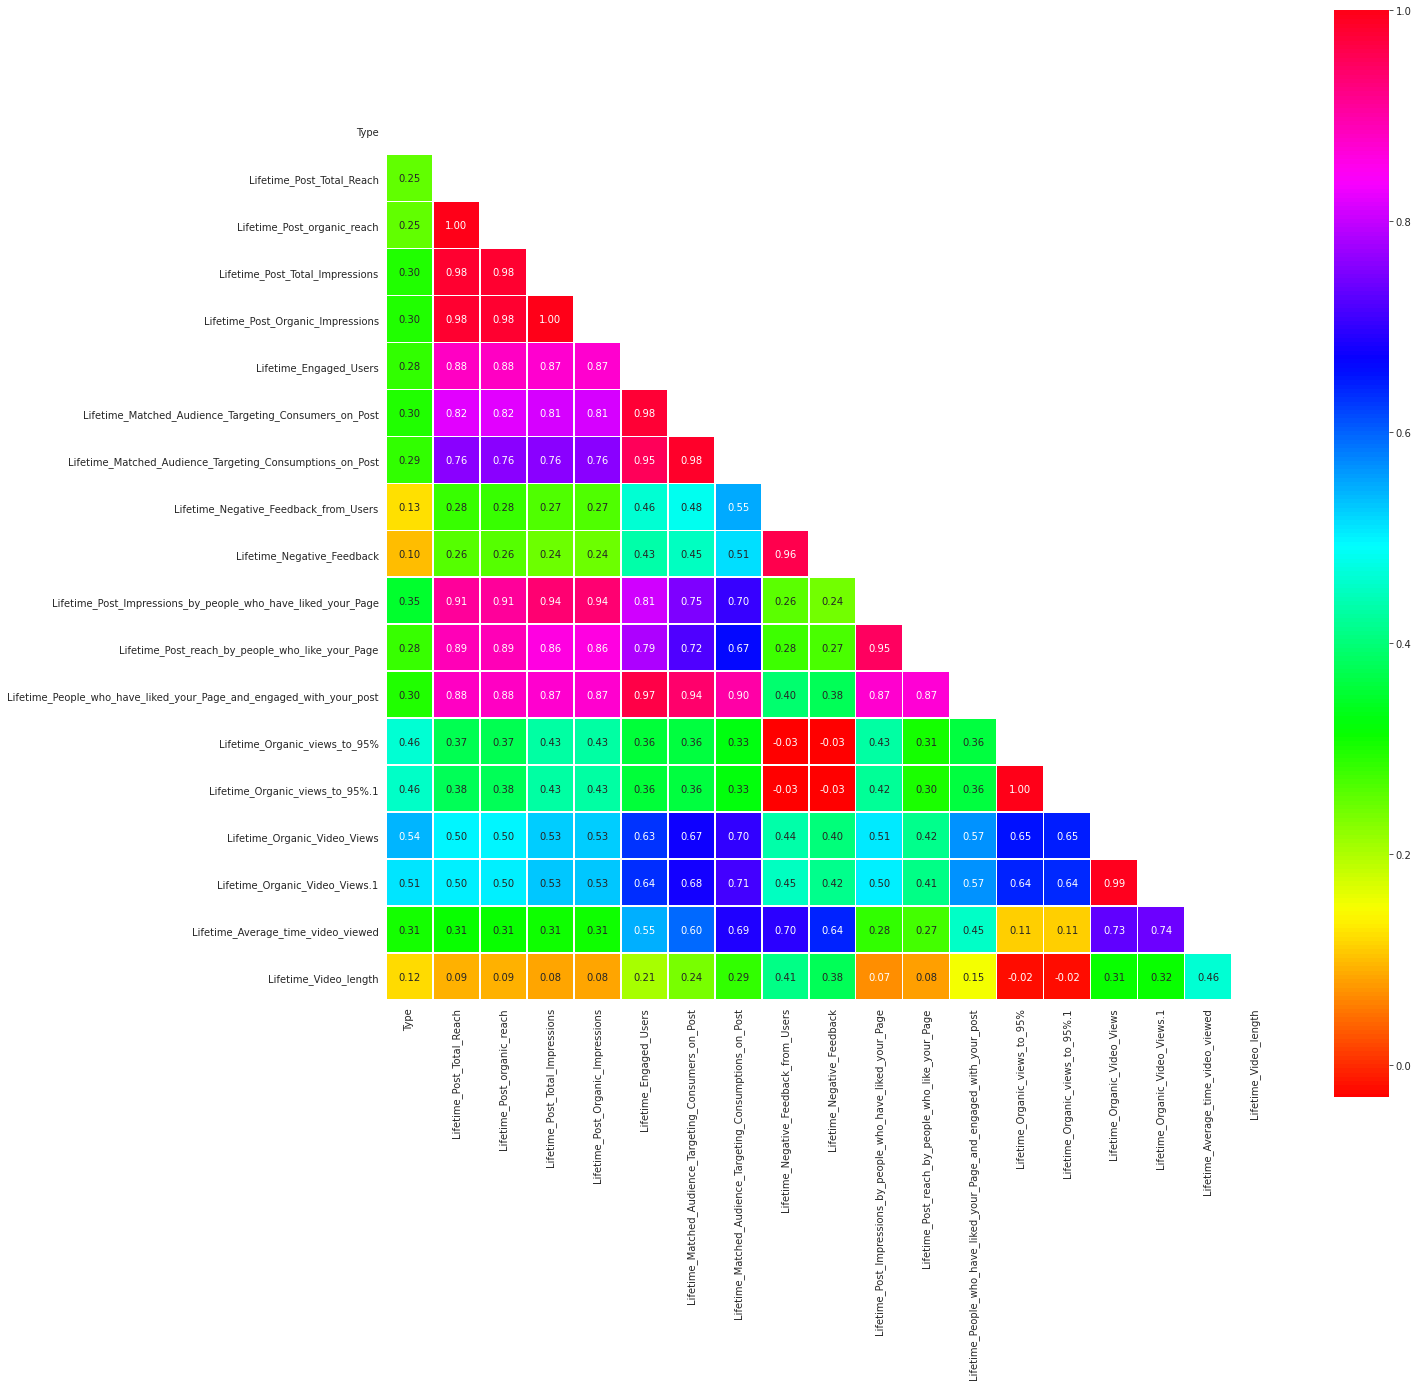

In [ ]:
corr = df.corr()  # Compute pairwise correlation of columns
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")  # plotting heatmap

### `Type`  pairwise correlation


*   At first we are finding the `co-relation` of `Type` vs all the columns
*   Then we are plotting the `heatmap` & `lineplot`
*   Then we are finding the maximum co-relation with `Type` & plotting it into graph

In [ ]:
corr = df.corr()
semi_df = pd.DataFrame(corr['Type'])

In [ ]:
from google.colab import data_table

column_relation_with="Type"
column_relation_name = ""
column_relation_value = ""

sorted_data = semi_df.sort_values(by=[column_relation_with], ascending=False)
data_table.DataTable(sorted_data)


for index, row in sorted_data.iterrows():
    if row[column_relation_with] < 0.999999:
      column_relation_name = index
      column_relation_value = row[column_relation_with]
      break

print("-"*100)
print(column_relation_with+" :")
print("Maximum correlated column name =",column_relation_name)
print("Maximum correlated column value =", column_relation_value)
print("-"*100)

----------------------------------------------------------------------------------------------------
Type :
Maximum correlated column name = Lifetime_Organic_Video_Views
Maximum correlated column value = 0.5449842622508128
----------------------------------------------------------------------------------------------------


From this `Lifetime_Organic_Video_Views vs Type` plot we can see that content of type 4  which is video content are more in number  than other type of contents and  has more lifetime organic views than any other type of content 

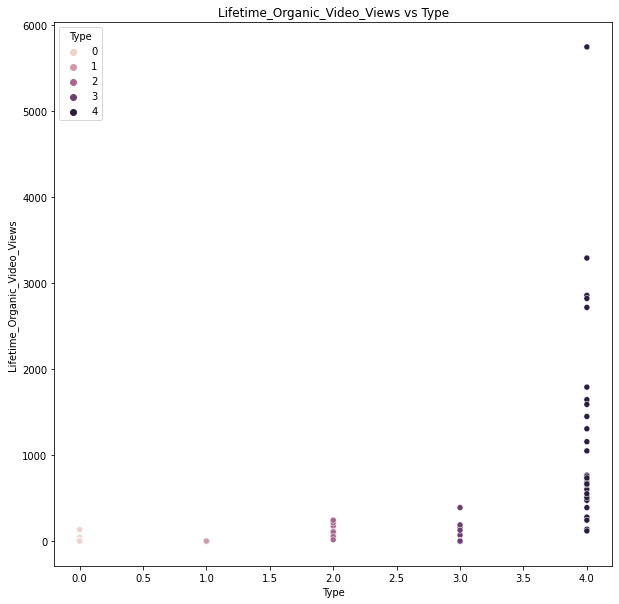

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
Label = column_relation_name+ " vs " +column_relation_with
scatterplot_data = sns.scatterplot(x="Type", y="Lifetime_Organic_Video_Views",hue="Type",
                data=df, ax=ax).set(title=Label)

From this `Lifetime_Engaged_Users vs Type` plot we can see that  content of type 1  which are photo contents have engaged more users than other type of content

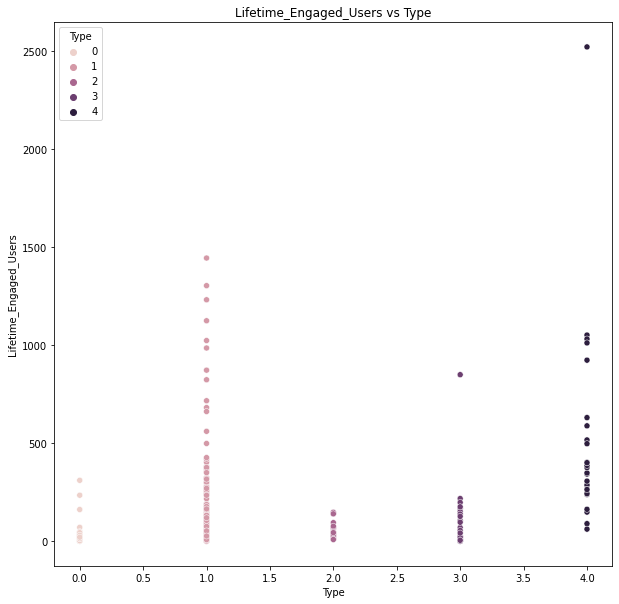

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
Label = "Lifetime_Engaged_Users"+ " vs " +"Type"
scatterplot_data = sns.scatterplot(x="Type", y="Lifetime_Engaged_Users",hue="Type",
                data=df, ax=ax).set(title=Label)

### `Lifetime_Post_Total_Reach`  pairwise correlation

*   At first we are finding the `co-relation` of `Lifetime_Post_Total_Reach` vs all the columns
*   Then we are plotting the `heatmap` & `lineplot`
*   Then we are finding the maximum co-relation with         `Lifetime_Post_Total_Reach` & plotting it into graph


In [ ]:
corr = df.corr()
semi_df = pd.DataFrame(corr['Lifetime_Post_Total_Reach'])

In [ ]:
from google.colab import data_table

column_relation_with="Lifetime_Post_Total_Reach"
column_relation_name = ""
column_relation_value = ""

sorted_data = semi_df.sort_values(by=[column_relation_with], ascending=False)
data_table.DataTable(sorted_data)


for index, row in sorted_data.iterrows():
    if row[column_relation_with] < 0.999999:
      column_relation_name = index
      column_relation_value = row[column_relation_with]
      break

print("-"*100)
print(column_relation_with+" :")
print("Maximum correlated column name =",column_relation_name)
print("Maximum correlated column value =", column_relation_value)
print("-"*100)

----------------------------------------------------------------------------------------------------
Lifetime_Post_Total_Reach :
Maximum correlated column name = Lifetime_Post_Total_Impressions
Maximum correlated column value = 0.9816005497437879
----------------------------------------------------------------------------------------------------


From this `Lifetime_Post_Total_Reach vs Lifetime_Post_Total_Impressions` plot we can see that the posts with more reach has more lifetime post  impression

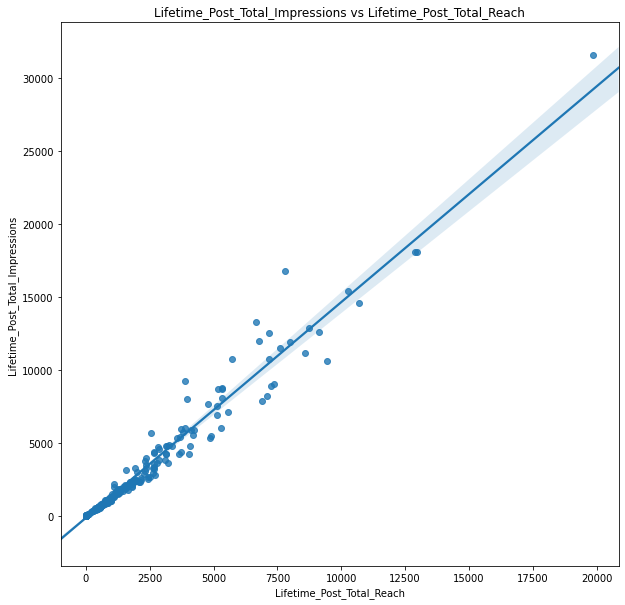

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
Label = column_relation_name+ " vs " +column_relation_with
scatterplot_data = sns.regplot(x="Lifetime_Post_Total_Reach", y="Lifetime_Post_Total_Impressions",truncate=False,
                data=df, ax=ax).set(title=Label)

### `Lifetime_Video_length` pairwise correlation


*   At first we are finding the `co-relation` of `Lifetime_Video_length` vs all the columns
*   Then we are plotting the `heatmap` & `lineplot`
*   Then we are finding the maximum co-relation with         `Lifetime_Video_length` & plotting it into graph

In [ ]:
corr = df.corr()
semi_df = pd.DataFrame(corr['Lifetime_Video_length'])

In [ ]:
from google.colab import data_table

column_relation_with="Lifetime_Video_length"
column_relation_name = ""
column_relation_value = ""

sorted_data = semi_df.sort_values(by=[column_relation_with], ascending=False)
data_table.DataTable(sorted_data)


for index, row in sorted_data.iterrows():
    if row[column_relation_with] < 0.999999:
      column_relation_name = index
      column_relation_value = row[column_relation_with]
      break

print("-"*100)
print(column_relation_with+" :")
print("Maximum correlated column name =",column_relation_name)
print("Maximum correlated column value =", column_relation_value)
print("-"*100)

----------------------------------------------------------------------------------------------------
Lifetime_Video_length :
Maximum correlated column name = Lifetime_Average_time_video_viewed
Maximum correlated column value = 0.4618910578925262
----------------------------------------------------------------------------------------------------


From this `Lifetime_Video_length vs Lifetime_Average_time_video_viewed` plot we can see that short videos has more views

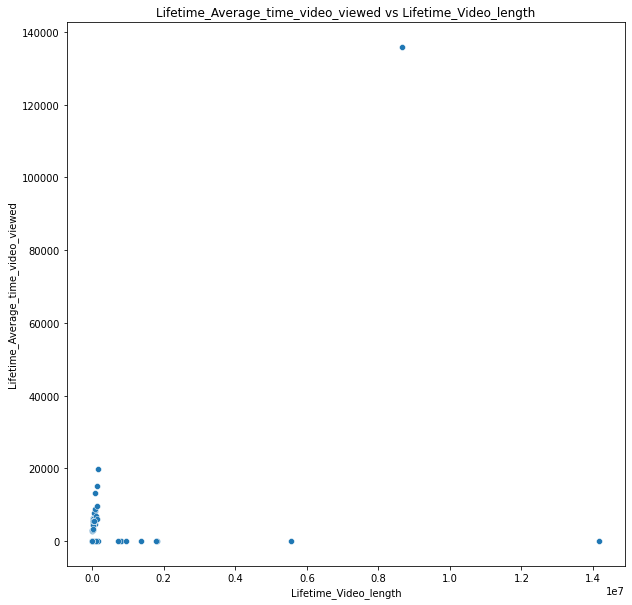

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
Label = column_relation_name+ " vs " +column_relation_with
scatterplot_data = sns.scatterplot(x="Lifetime_Video_length", y="Lifetime_Average_time_video_viewed",
                data=df, ax=ax).set(title=Label)

##  Similar way we can find the correlation with others column

In [ ]:
corr_df = df.corr()
relation_df = []

for col in corr.columns:
  semi_df = pd.DataFrame(corr[col])
  column_relation_with=col
  column_relation_name = ""
  column_relation_value = ""

  sorted_data = semi_df.sort_values(by=[column_relation_with], ascending=False)
  for index, row in sorted_data.iterrows():
    if row[column_relation_with] < 0.999999:
      column_relation_name = index
      column_relation_value = row[column_relation_with]
      break

  if type(column_relation_value) is not str :
    relation_df.append([column_relation_with, column_relation_name , column_relation_value])


relation_df = pd.DataFrame(relation_df)   
relation_df.columns = ['relation','relation-with','correlation-value']


display(relation_df)

relation  ... correlation-value
0                                                Type  ...          0.544984
1                           Lifetime_Post_Total_Reach  ...          0.981601
2                         Lifetime_Post_organic_reach  ...          0.981601
3                     Lifetime_Post_Total_Impressions  ...          0.981601
4                   Lifetime_Post_Organic_Impressions  ...          0.981601
5                              Lifetime_Engaged_Users  ...          0.979857
6   Lifetime_Matched_Audience_Targeting_Consumers_...  ...          0.984577
7   Lifetime_Matched_Audience_Targeting_Consumptio...  ...          0.984577
8               Lifetime_Negative_Feedback_from_Users  ...          0.962623
9                          Lifetime_Negative_Feedback  ...          0.962623
10  Lifetime_Post_Impressions_by_people_who_have_l...  ...          0.948412
11   Lifetime_Post_reach_by_people_who_like_your_Page  ...          0.948412
12  Lifetime_People_who_have_liked_your_Page_and_e...  ...          0.966099
13                      Lifetime_Organic_views_to_95%  ...          0.998363
14                    Lifetime_Organic_views_to_95%.1  ...          0.998363
15                       Lifetime_Organic_Video_Views  ...          0.994840
16                     Lifetime_Organic_Video_Views.1  ...          0.994840
17                 Lifetime_Average_time_video_viewed  ...          0.741235
18                              Lifetime_Video_length  ...          0.461891

[19 rows x 3 columns]

# Machine Learning Applied



*   Tranning = 80% 
*   Testing = 20% 



Taking the 'Type' column as our label

In [ ]:
X=df.drop('Type',axis=1)
y=df['Type']

Normalizing the data and dividing the training and testing data where training data = 80% and tetsing data = 20%

 

In [ ]:
X_norm=preprocessing.normalize(X) #data normalization
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,random_state=101)

In [ ]:
X_train,y_train

(array([[3.90985137e-01, 3.90985137e-01, 4.70885626e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.04476484e-01, 4.04476484e-01, 4.42257255e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.75048910e-01, 3.75048910e-01, 4.55645502e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [5.36307330e-03, 5.36307330e-03, 7.53418341e-03, ...,
         6.90154205e-04, 0.00000000e+00, 9.99875283e-01],
        [4.26690307e-01, 4.26690307e-01, 5.50205922e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.94357186e-01, 4.94357186e-01, 4.94357186e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), 161    1
 269    1
 181    1
 75     2
 90     1
       ..
 41     3
 76     1
 88     0
 64     1
 12     1
 Name: Type, Length: 232, dtype: int64)

# Model Train

## Regression Model Train

In [ ]:
regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()],
  ]
reg_pred=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions)) # root mean squared  error loss
    reg_pred.append(rms)
    print(name,rms)

Results...

Linear Regression : 0.7351658821745256
Decision Tree Regression : 0.9592546541588546
Random Forest Regression : 0.8043491058796843
Gradient Boosting Regression : 0.8161700579448252
Extra Tree Regression : 0.7920171629710293
K-Neighbors Regression : 0.8477287701833708
Support Vector Regression : 0.8173486181036972


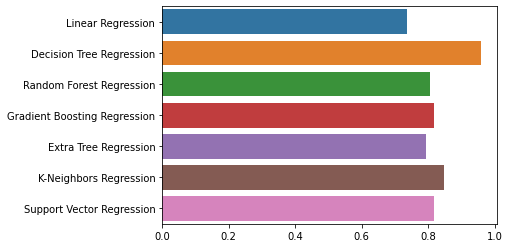

In [ ]:
y_ax=['Linear Regression' ,
      'Decision Tree Regression', 
      'Random Forest Regression',
      'Gradient Boosting Regression',
      'Extra Tree Regression' ,
      'K-Neighbors Regression', 
      'Support Vector Regression' ]
x_ax=reg_pred

sns.barplot(x=x_ax,y=y_ax,linewidth=1.5)

From this bar plotting we see the `RMS` loss behind the all `regression` algo. So,you say `less loss` is giving better performance  

## Classifier Model Train

In [ ]:
classifiers=[
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gausian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model_c in classifiers:
    model_c=model_c
    model_c.fit(X_train,y_train)
    predictions = model_c.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Decision Tree Classification : 0.7627118644067796
Random Forest Classification : 0.7966101694915254
Gradient Boosting Classification : 0.7288135593220338
Ada Boosting Classification : 0.6440677966101694
Extra Tree Classification : 0.7796610169491526
K-Neighbors Classification : 0.7796610169491526
Support Vector Classification : 0.7796610169491526
Gausian Naive Bayes : 0.8135593220338984


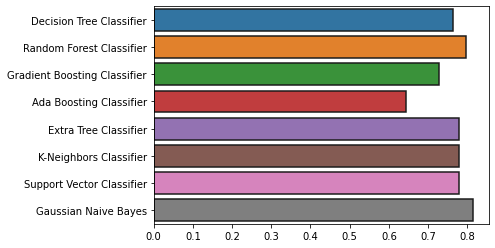

In [ ]:
C_y_ax=y_ax=[
      'Decision Tree Classifier',
      'Random Forest Classifier',
      'Gradient Boosting Classifier',
      'Ada Boosting Classifier',
      'Extra Tree Classifier' ,
      'K-Neighbors Classifier',
      'Support Vector Classifier',
      'Gaussian Naive Bayes'
]

C_x_ax=cla_pred
sns.barplot(x=C_x_ax,y=C_y_ax,linewidth=1.5,edgecolor="0.1")

From this bar plotting we see the accuracy  behind the all `classification` algo. So, you say `good accuracy` is giving better performance

## Classifier Tree

### Decision Tree Classifier

In [ ]:
clf_D = DecisionTreeClassifier()
clf_D.fit(X, y)



fig = plt.figure(figsize=(200,200))
_ = tree.plot_tree(clf_D, 
                   feature_names=df.columns,  
                   class_names=['Link', 'Photo', 'SharedVideo', 'Status', 'Video'],
                   filled=True)

### Random Forest Classifier

In [ ]:
clf_R = RandomForestClassifier()
clf_R.fit(X, y)

fig = plt.figure(figsize=(200,200))
_ = tree.plot_tree(clf_R.estimators_[5], 
                   feature_names=df.columns,  
                   class_names=['Link', 'Photo', 'SharedVideo', 'Status', 'Video'],
                   filled=True)

# Summary

In this notebook we worked with the insight_002.csv dataset.This dataset consists the informations about the posts of the page. This dataset consists of 293 rows and 32 columns.This dataset is comapretively better than insight_002.csv dataset. This dataset contains less null values. In order to work with this dataset we had to drop several columns. That's why we had to perform lots of pre processing steps. For the analysis part we divided the whole procedure into 6 sections.

# Downloading Dataset :

We uploaded the given  dataset to google drive and zipped it to upload to google drive.Then we downloaded the file with gdown and then unzipped it.

#Importing All The Packages :

We used the python language and imported all the necessary packages   

#Loading Data :

We used the pandas library to load the data from the csv file.

#Data Processing and Cleaning : 

This is the most important step of our whole procedure.At first, we have dropped some of the unused columns. These columns were hampering the visualization. We have also dropped some of the colums, which had the value like null or 0 like, languages, country, postId etc.   

We have converted the whole dataset to Integer 64. We had to use label enconding for a special column named 'Type', this label enconding converts string to integer. 

#Data Analysis:

We have collected some information based on the current state of data for example, mean, standard deviation etc based on their columns. Then we found the co-realtion among them. On the basis of the column correaltion value we produced a heatmap. And also we did pair plotting. From these 2 plots we gathered a lot of informations. We found how each and every column of this dataset is correlated. 

For sample we have worked with 3 columns and showed co-relation among them. Similarly we can find the correlation with other columns.


#Machine Learning : 

We divided the whole dataset into 2 portions, training and testing. Training contains 80% of the whole dataset and testing portion contains of 20% of the dataset.  

We have used the special column 'Type' as the label(Y) and rest of the colums as feature(X). We have also normalized the whole dataset.

We have applied regression algorithm and classificaton algorithm on the training and testing data. And also we have generated tree for the graphical representation of decision tree and random forest. 

In this way we completed our analysis.There are lots of possible cases.The steps that we performed in the above mentioned process are our hypothesis.





# <center>--- Thank You --</center>